In [110]:
# Import all necessary packages/libraries
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt

In [111]:
# Reading the data
top_150_cities = pd.read_csv(r"top_150_cities_india.csv", delimiter=',')
df_original_len = len(top_150_cities)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(top_150_cities.shape[0], top_150_cities.shape[1]))

Original length of dataframe: 150
There are 150 rows and 9 columns in the dataset


In [112]:
# Function to normalize text; replace ā, ī, etcetera
# lower() at the end to make all values lowercase
def normalize_text(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()

# Columns the function should apply to
columns_to_clean = ['city', 'admin_name']

# For loop in order to apply function to each column specified
for column in columns_to_clean:
    top_150_cities[column] = top_150_cities[column].apply(normalize_text)

In [113]:
print(top_150_cities.head())
print(top_150_cities.tail())

        city      lat      lng country iso2   admin_name capital  population  \
0      delhi  28.6100  77.2300   India   IN        delhi   admin    32226000   
1     mumbai  19.0761  72.8775   India   IN  maharashtra   admin    24973000   
2    kolkata  22.5675  88.3700   India   IN  west bengal   admin    18502000   
3  bangalore  12.9789  77.5917   India   IN    karnataka   admin    15386000   
4    chennai  13.0825  80.2750   India   IN   tamil nadu   admin    12395000   

   population_proper  
0           16753235  
1           12478447  
2            4496694  
3            8443675  
4            6727000  
             city      lat      lng country iso2 admin_name capital  \
145    bendravadi  12.3636  76.9137   India   IN  karnataka     NaN   
146   kodagihalli  12.9771  77.4651   India   IN  karnataka     NaN   
147  harna buzurg  25.0981  87.0148   India   IN      bihar     NaN   
148   mailanhalli  13.1863  77.6963   India   IN  karnataka     NaN   
149     sultanpur  25.5248

In [114]:
# Drop the specified columns, these columns are not necessary for the purpose of this assignment
top_150_cities = top_150_cities.drop(columns=['iso2', 'capital', 'population_proper'])

# Rename 'admin_name' to a more suitable name
top_150_cities = top_150_cities.rename(columns={'admin_name': 'state_name'})

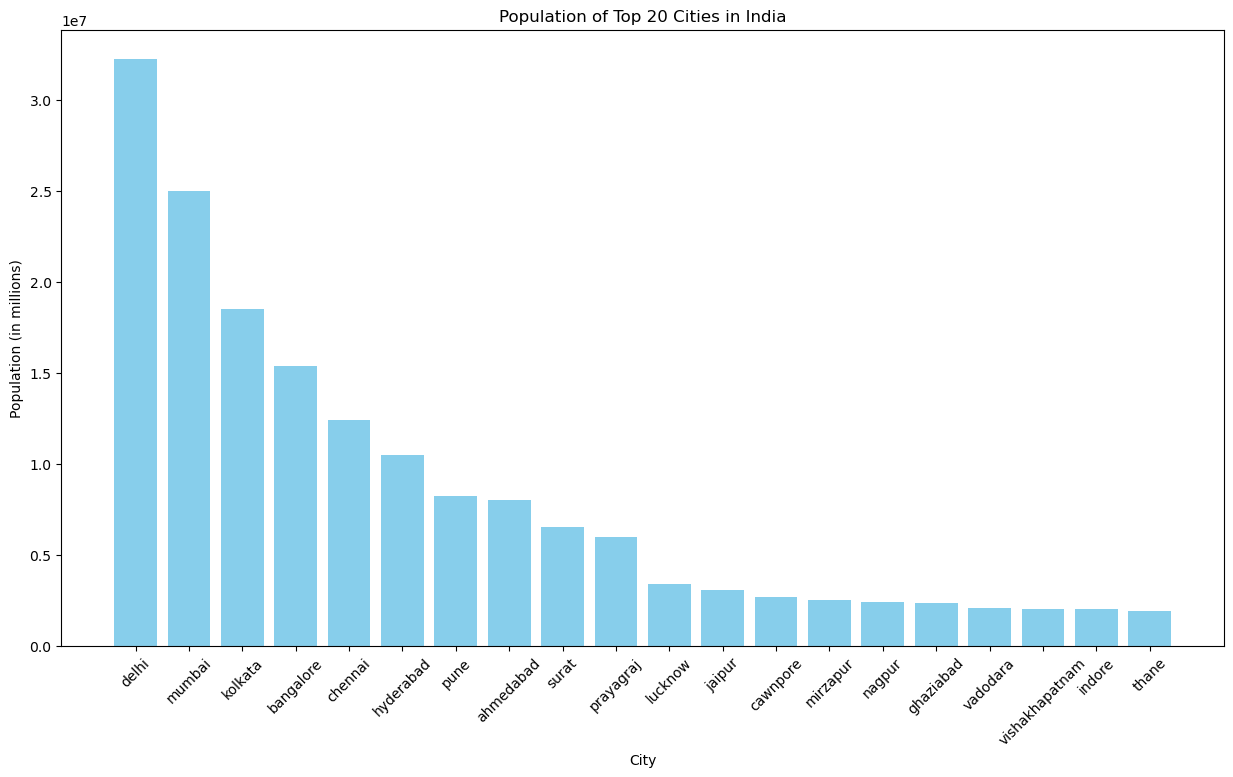

In [115]:
# Bar chart for population

# Sort the top 20 cities
top_20_cities = top_150_cities.sort_values(by='population', ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_cities["city"], top_20_cities["population"], color='skyblue')
plt.xlabel('City')
plt.ylabel('Population (in millions)')
plt.title('Population of Top 20 Cities in India')
plt.xticks(rotation=45)  # Rotate the city names for better readability
plt.show()

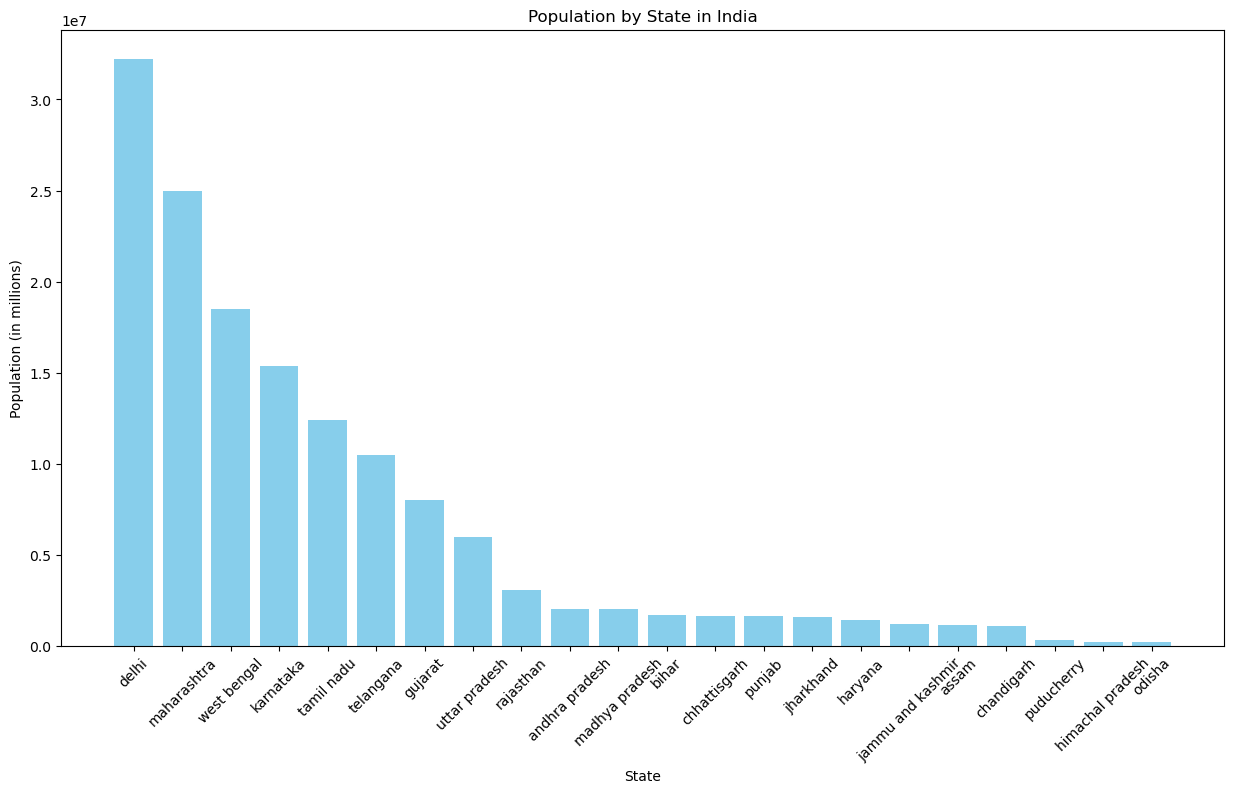

In [116]:
# Bar chart for population

# Create the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_150_cities["state_name"], top_150_cities["population"], color='skyblue')
plt.xlabel('State')
plt.ylabel('Population (in millions)')
plt.title('Population by State in India')
plt.xticks(rotation=45)  # Rotate the city names for better readability
plt.show()

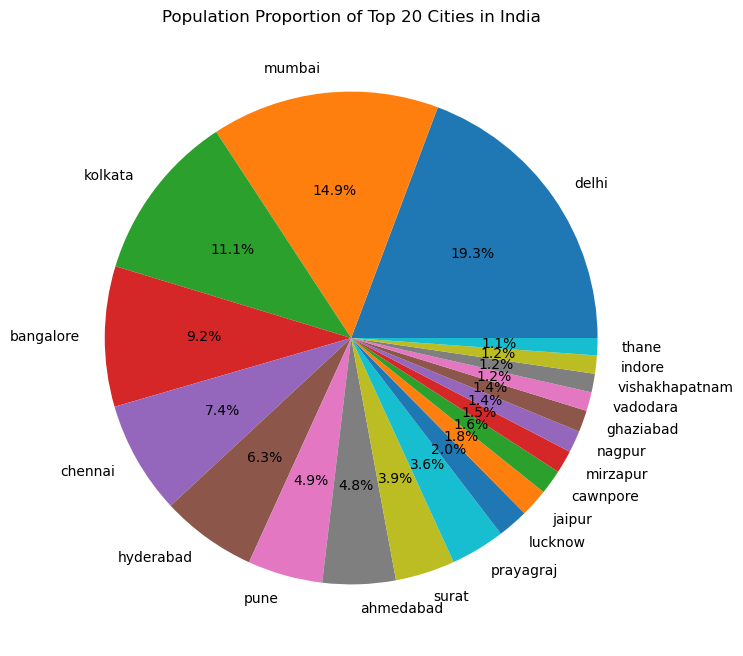

In [117]:
# Pie chart for population proportion

# Select the top 20 cities
top_20_cities = top_150_cities.sort_values(by='population', ascending=False).head(20)

# Create the chart
plt.figure(figsize=(8, 8))
plt.pie(top_20_cities["population"], labels=top_20_cities["city"], autopct='%1.1f%%')
plt.title('Population Proportion of Top 20 Cities in India')
plt.show()

In [118]:
# Save the cleaned dataset
top_150_cities.to_csv('top_150_cities_cleaned.csv', index=False)

# Find matches between cities in BankTransactions csv file and top 150 cities csv file

In [119]:
# Reading the bank transactions data
bank_transactions_data = pd.read_csv(r"bank_transactions.csv", delimiter=',')
df_original_len = len(bank_transactions_data)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(bank_transactions_data.shape[0], bank_transactions_data.shape[1]))

Original length of dataframe: 1048567
There are 1048567 rows and 9 columns in the dataset


In [122]:
# Reading the bank transactions data
top_150_cities_cleaned = pd.read_csv(r"top_150_cities_cleaned.csv", delimiter=',')
df_original_len = len(top_150_cities_cleaned)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(top_150_cities_cleaned.shape[0], top_150_cities_cleaned.shape[1]))

Original length of dataframe: 150
There are 150 rows and 6 columns in the dataset


In [123]:
bank_transactions_data['CustLocation'] = bank_transactions_data['CustLocation'].str.lower()
top_150_cities_cleaned['city'] = top_150_cities_cleaned['city'].str.lower()


In [127]:
# Find matches
matches = bank_transactions_data[bank_transactions_data['CustLocation'].isin(top_150_cities_cleaned['city'])]

# Print the number of matches
print("Total matches found:", len(matches))



Total matches found: 597601
